In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('E:\\ML Datasets\\Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.utils import shuffle

In [5]:
df=shuffle(df)

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5,6,5.4,3.9,1.7,0.4,Iris-setosa
124,125,6.7,3.3,5.7,2.1,Iris-virginica
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
34,35,4.9,3.1,1.5,0.1,Iris-setosa
123,124,6.3,2.7,4.9,1.8,Iris-virginica


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 5 to 62
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 13.2+ KB


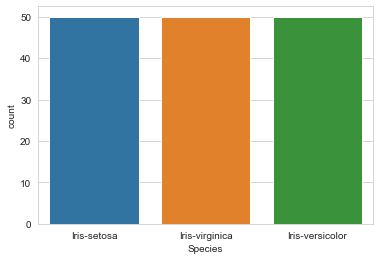

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Species',data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BA37C48>,
      dtype=object)

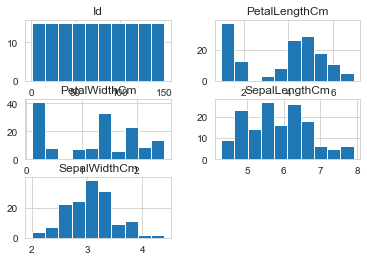

In [9]:
df.hist()

In [13]:
species_map = {'Iris-setosa':0,'Iris-virginica':1,'Iris-versicolor':2}
df['Species']=df['Species'].map(species_map)

In [14]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5,6,5.4,3.9,1.7,0.4,0
124,125,6.7,3.3,5.7,2.1,1
77,78,6.7,3.0,5.0,1.7,2
34,35,4.9,3.1,1.5,0.1,0
123,124,6.3,2.7,4.9,1.8,1


In [17]:
x=df.iloc[:,:5]
y=df.iloc[:,-1]

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lg_model = LogisticRegression()

In [22]:
lg_model.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
lg_pred = lg_model.predict(x_test)

In [25]:
accuracy = accuracy_score(y_test,lg_pred)
accuracy

0.9777777777777777

In [26]:
svc_model=SVC(kernel='linear')

In [28]:
svc_model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
svc_pred=svc_model.predict(x_test)

In [31]:
accuracy=accuracy_score(y_test,svc_pred)
accuracy

1.0

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,svc_pred)

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 16]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report

In [36]:
classification_report(y_test,svc_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        13\n           1       1.00      1.00      1.00        16\n           2       1.00      1.00      1.00        16\n\n    accuracy                           1.00        45\n   macro avg       1.00      1.00      1.00        45\nweighted avg       1.00      1.00      1.00        45\n'